##### DGL DOCS

In [8]:
import dgl
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as fn

import networkx as nx
import matplotlib as plt
%matplotlib inline

In [9]:
import tensorflow as tf

In [10]:
tf.reduce_sum(tf.random.normal([1000, 1000]))

<tf.Tensor: shape=(), dtype=float32, numpy=242.33118>

In [11]:
import transformers as tr
tr.__version__ 

'4.25.1'

In [12]:
u,v = torch.tensor([0,0,0,1]),torch.tensor([1,2,3,3])

In [13]:
u,v

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))

In [14]:
g = dgl.graph((u,v))
g

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

In [15]:
g.nodes()

tensor([0, 1, 2, 3])

In [16]:
g.edges()

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))

In [17]:
g.edges(form='all')

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))

In [18]:
dgl.to_bidirected(g)

Graph(num_nodes=4, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

In [19]:
g

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

In [20]:
g = dgl.graph((torch.tensor([0,0,1,5]), torch.tensor([1,2,2,0])))
g

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

In [21]:
g.num_nodes(),g.num_edges()

(6, 4)

In [22]:
plt.figure.Figure()

<Figure size 640x480 with 0 Axes>

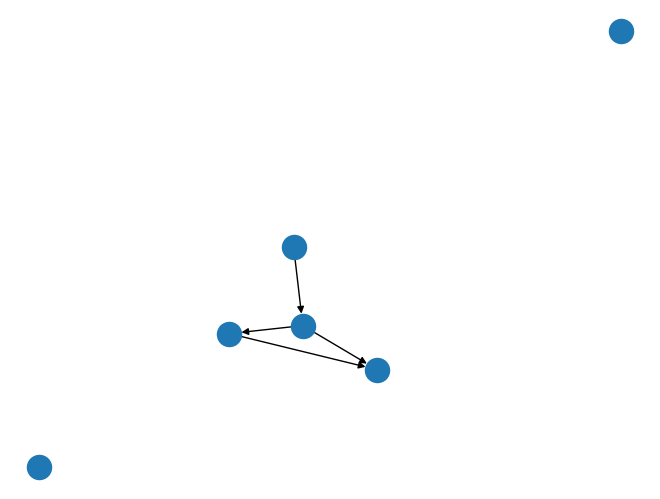

In [23]:
#plt.figure(figsize([5,7]))
nx.draw(g.to_networkx(),)

In [24]:
g.ndata['x'] =  torch.ones(g.num_nodes(), 3)
g.edata['x'] = 

SyntaxError: invalid syntax (1555257691.py, line 2)

In [25]:
edges = torch.tensor([2,5,3]),torch.tensor([3,5,0])

In [26]:
g = dgl.graph(edges)
g

Graph(num_nodes=6, num_edges=3,
      ndata_schemes={}
      edata_schemes={})

#### checking Tokenising methods in Transformers

In [27]:
import transformers
import datasets

In [28]:
ds_list = datasets.list_datasets()
ds_list[:5]

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus']

In [29]:
squad_data =  datasets.load_dataset('squad')

Found cached dataset squad (/Users/kunal21/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)


  0%|          | 0/2 [00:00<?, ?it/s]

In [30]:
squad_data.keys()

dict_keys(['train', 'validation'])

In [31]:
len(squad_data)

2

In [32]:
len(squad_data.get('train'))

87599

In [33]:
squad_data['train'].features

{'id': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None),
 'context': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None)}

In [34]:
from transformers import BertTokenizer

In [35]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [36]:
squad_data['train']

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 87599
})

In [37]:
tokenizer('kunal',max_length= 512, truncation=True)

{'input_ids': [101, 28919, 2389, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [38]:
# squad_data['train'].map(
#     lambda x: tokenizer(
#         x['content'],x['context'],
#         max_length=512,truncation=True
#     ),batched=True, batch_size=32
# )
# LATER - to check with serialization = false

### DGL

In [39]:
import dgl.data as dgldatasets

import dgl
import torch
import torch.nn as nn
import torch.nn.functional as fn




In [40]:
karateclub_data =  dgldatasets.KarateClubDataset()

In [41]:
type(karateclub_data)

dgl.data.karate.KarateClubDataset

In [42]:
karateclub_data[0]

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={})

#### Node classificaiton task

In [43]:
data =  dgldatasets.CoraGraphDataset()
data.num_classes

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


7

In [44]:
type(data)

dgl.data.citation_graph.CoraGraphDataset

In [45]:
g = data[0]
g

Graph(num_nodes=2708, num_edges=10556,
      ndata_schemes={'feat': Scheme(shape=(1433,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool), 'train_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})

In [46]:
g.ndata

{'feat': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'label': tensor([3, 4, 4,  ..., 3, 3, 3]), 'val_mask': tensor([False, False, False,  ..., False, False, False]), 'test_mask': tensor([False, False, False,  ...,  True,  True,  True]), 'train_mask': tensor([ True,  True,  True,  ..., False, False, False])}

In [47]:
from dgl.nn import GraphConv

In [48]:
class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats,h_feats)
        self.conv2 = GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = fn.relu(h)
        h = self.conv2(g,h)
        return h


model = GCN(g.ndata['feat'].shape[1],16, data.num_classes)            



In [49]:
g.ndata['label']

tensor([3, 4, 4,  ..., 3, 3, 3])

In [50]:
def train_model(g, model):
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    best_val_acc =0
    best_test_acc = 0

    val_acc =0
    test_acc = 0


    features = g.ndata['feat']
    labels = g.ndata['label']
    train_mask = g.ndata['train_mask']
    val_mask = g.ndata['val_mask']
    test_mask = g.ndata['test_mask']

    for e in range(0,100):
        #forward
        logits = model(g, features)

        #compute predictions
        pred = logits.argmax(1)

        ##compute loss

        loss = fn.cross_entropy(logits[train_mask], logits[train_mask])

        ##copmute accuracy

        train_acc = (pred[train_mask] ==  labels[train_mask]).float().mean()
        val_acc = (pred[val_acc] ==  labels[val_acc]).float().mean()
        test_acc = (pred[test_acc] ==  labels[test_acc]).float().mean()
        # Save the best validation accuracy and the corresponding test accuracy.
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_test_acc = test_acc

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if e % 5 == 0:
            print('In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f}), test acc: {:.3f} (best {:.3f})'.format(
                e, loss, val_acc, best_val_acc, test_acc, best_test_acc))
model = GCN(g.ndata['feat'].shape[1], 16, data.num_classes)

train_model(g, model)      

In epoch 0, loss: 0.014, val acc: 0.000 (best 0.000), test acc: 0.000 (best 0.000)


IndexError: tensors used as indices must be long, byte or bool tensors

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
def drawnx(g):
    gx = dgl.to_networkx(g)
    nx.draw(gx, with_labels=True)

### Nodes and edges

In [53]:
# edges 0->1, 0->2, 0->3, 1->3

u,v = torch.tensor([0,0,0,1]),torch.tensor([1,2,3,3])
g = dgl.graph((u,v))
g   

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

In [54]:
g.nodes()

tensor([0, 1, 2, 3])

In [55]:
g.edges()

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))

In [56]:
g.edges(form='all')## Edge end nodes and edge IDs

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))

In [57]:

# If the node with the largest ID is isolated (meaning no edges),
# then one needs to explicitly set the number of nodes
g8 = dgl.graph((u, v), num_nodes=8)
g8

Graph(num_nodes=8, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

In [58]:
g8.edges(form='all')

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))

In [59]:
g8.edges()

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))

In [60]:
g = dgl.to_bidirected(g)
g

Graph(num_nodes=4, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

In [61]:
g.edges(form='all')

(tensor([0, 0, 0, 1, 1, 2, 3, 3]),
 tensor([1, 2, 3, 0, 3, 0, 0, 1]),
 tensor([0, 1, 2, 3, 4, 5, 6, 7]))

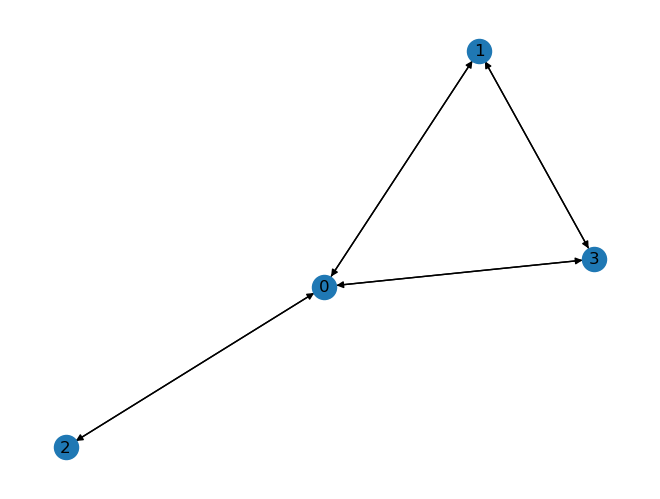

In [62]:
drawnx(g)

#### Node and Edge features

In [63]:
torch.tensor([0,0,1,5])

tensor([0, 0, 1, 5])

In [64]:
g = dgl.graph((torch.tensor([0,0,1,5]),torch.tensor([1,2,2,0])))
g

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

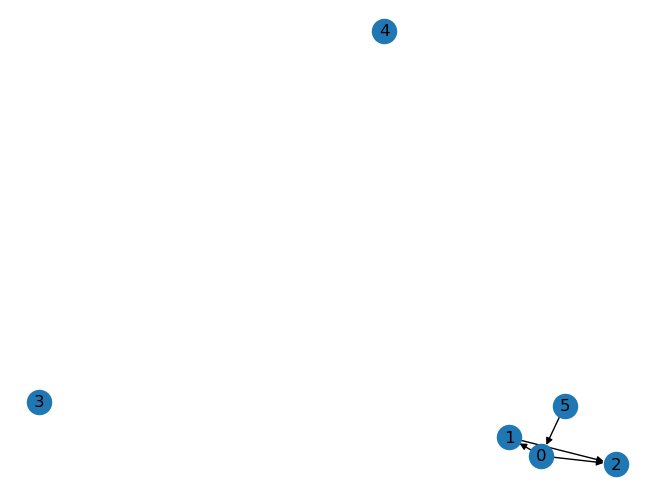

In [65]:
drawnx(g)

In [66]:
g.edges(form='all')

(tensor([0, 0, 1, 5]), tensor([1, 2, 2, 0]), tensor([0, 1, 2, 3]))

In [67]:
g.edges(),g.nodes()

((tensor([0, 0, 1, 5]), tensor([1, 2, 2, 0])), tensor([0, 1, 2, 3, 4, 5]))

In [68]:
g.num_edges()

4

In [69]:
torch.ones(g.num_edges(),3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [70]:
torch.ones(g.num_nodes(),3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [71]:
g.ndata['x'] = torch.ones(g.num_nodes(),3)
g.edata['x'] = torch.ones(g.num_edges())

In [72]:
torch.ones(g.num_edges())

tensor([1., 1., 1., 1.])

In [73]:
g

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.float32)})

#### Node Classification with DGL¶

In [74]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F

In [75]:
import dgl.data

dataset = dgl.data.CoraGraphDataset()
print('Number of categories:', dataset.num_classes)

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
Number of categories: 7


In [76]:
g = dataset[0]


In [77]:
print('Node features')
print(g.ndata)
print('Edge features')
print(g.edata)

Node features
{'feat': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'label': tensor([3, 4, 4,  ..., 3, 3, 3]), 'val_mask': tensor([False, False, False,  ..., False, False, False]), 'test_mask': tensor([False, False, False,  ...,  True,  True,  True]), 'train_mask': tensor([ True,  True,  True,  ..., False, False, False])}
Edge features
{}


In [78]:
from dgl.nn import GraphConv
import torch.nn as nn

In [79]:
from dgl.nn import GraphConv

class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats)
        self.conv2 = GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

# Create the model with given dimensions
model = GCN(g.ndata['feat'].shape[1], 16, dataset.num_classes)

In [80]:
def train(g, model):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    best_val_acc = 0
    best_test_acc = 0

    features = g.ndata['feat']
    labels = g.ndata['label']
    train_mask = g.ndata['train_mask']
    val_mask = g.ndata['val_mask']
    test_mask = g.ndata['test_mask']
    for e in range(100):
        # Forward
        logits = model(g, features)

        # Compute prediction
        pred = logits.argmax(1)

        # Compute loss
        # Note that you should only compute the losses of the nodes in the training set.
        loss = F.cross_entropy(logits[train_mask], labels[train_mask])

        # Compute accuracy on training/validation/test
        train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
        val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
        test_acc = (pred[test_mask] == labels[test_mask]).float().mean()

        # Save the best validation accuracy and the corresponding test accuracy.
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_test_acc = test_acc

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if e % 5 == 0:
            print('In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f}), test acc: {:.3f} (best {:.3f})'.format(
                e, loss, val_acc, best_val_acc, test_acc, best_test_acc))
model = GCN(g.ndata['feat'].shape[1], 16, dataset.num_classes)
train(g, model)

In epoch 0, loss: 1.945, val acc: 0.242 (best 0.242), test acc: 0.205 (best 0.205)
In epoch 5, loss: 1.886, val acc: 0.560 (best 0.560), test acc: 0.607 (best 0.607)
In epoch 10, loss: 1.801, val acc: 0.622 (best 0.622), test acc: 0.647 (best 0.647)
In epoch 15, loss: 1.694, val acc: 0.596 (best 0.622), test acc: 0.632 (best 0.647)
In epoch 20, loss: 1.565, val acc: 0.658 (best 0.658), test acc: 0.659 (best 0.659)
In epoch 25, loss: 1.417, val acc: 0.694 (best 0.694), test acc: 0.681 (best 0.681)
In epoch 30, loss: 1.257, val acc: 0.700 (best 0.702), test acc: 0.706 (best 0.695)
In epoch 35, loss: 1.092, val acc: 0.708 (best 0.708), test acc: 0.722 (best 0.722)
In epoch 40, loss: 0.929, val acc: 0.720 (best 0.720), test acc: 0.728 (best 0.728)
In epoch 45, loss: 0.777, val acc: 0.732 (best 0.732), test acc: 0.731 (best 0.732)
In epoch 50, loss: 0.639, val acc: 0.738 (best 0.738), test acc: 0.740 (best 0.739)
In epoch 55, loss: 0.521, val acc: 0.742 (best 0.742), test acc: 0.752 (best 0

### Write your own GNN module¶

In [81]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F

In [82]:
import dgl.function as fn

class SAGEConv(nn.Module):
    """Graph convolution module used by the GraphSAGE model.

    Parameters
    ----------
    in_feat : int
        Input feature size.
    out_feat : int
        Output feature size.
    """
    def __init__(self, in_feat, out_feat):
        super(SAGEConv, self).__init__()
        # A linear submodule for projecting the input and neighbor feature to the output.
        self.linear = nn.Linear(in_feat * 2, out_feat)

    def forward(self, g, h):
        """Forward computation

        Parameters
        ----------
        g : Graph
            The input graph.
        h : Tensor
            The input node feature.
        """
        with g.local_scope():
            g.ndata['h'] = h
            # update_all is a message passing API.
            g.update_all(message_func=fn.copy_u('h', 'm'), reduce_func=fn.mean('m', 'h_N'))
            h_N = g.ndata['h_N']
            h_total = torch.cat([h, h_N], dim=1)
            return self.linear(h_total)

In [83]:
class Model(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(Model, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats)
        self.conv2 = SAGEConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

In [84]:
import dgl.data

dataset = dgl.data.CoraGraphDataset()
g = dataset[0]

def train(g, model):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    all_logits = []
    best_val_acc = 0
    best_test_acc = 0

    features = g.ndata['feat']
    labels = g.ndata['label']
    train_mask = g.ndata['train_mask']
    val_mask = g.ndata['val_mask']
    test_mask = g.ndata['test_mask']
    for e in range(200):
        # Forward
        logits = model(g, features)

        # Compute prediction
        pred = logits.argmax(1)

        # Compute loss
        # Note that we should only compute the losses of the nodes in the training set,
        # i.e. with train_mask 1.
        loss = F.cross_entropy(logits[train_mask], labels[train_mask])

        # Compute accuracy on training/validation/test
        train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
        val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
        test_acc = (pred[test_mask] == labels[test_mask]).float().mean()

        # Save the best validation accuracy and the corresponding test accuracy.
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_test_acc = test_acc

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        all_logits.append(logits.detach())

        if e % 5 == 0:
            print('In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f}), test acc: {:.3f} (best {:.3f})'.format(
                e, loss, val_acc, best_val_acc, test_acc, best_test_acc))

model = Model(g.ndata['feat'].shape[1], 16, dataset.num_classes)
train(g, model)

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
In epoch 0, loss: 1.946, val acc: 0.072 (best 0.072), test acc: 0.091 (best 0.091)
In epoch 5, loss: 1.888, val acc: 0.432 (best 0.472), test acc: 0.466 (best 0.506)
In epoch 10, loss: 1.767, val acc: 0.460 (best 0.472), test acc: 0.503 (best 0.506)
In epoch 15, loss: 1.579, val acc: 0.578 (best 0.578), test acc: 0.595 (best 0.595)
In epoch 20, loss: 1.331, val acc: 0.662 (best 0.662), test acc: 0.669 (best 0.669)
In epoch 25, loss: 1.047, val acc: 0.726 (best 0.726), test acc: 0.730 (best 0.730)
In epoch 30, loss: 0.761, val acc: 0.764 (best 0.764), test acc: 0.760 (best 0.760)
In epoch 35, loss: 0.514, val acc: 0.768 (best 0.768), test acc: 0.767 (best 0.765)
In epoch 40, loss: 0.328, val acc: 0.768 (best 0.772), test acc: 0.772 (best 0.771)
In epoch 45, loss: 0.204, val acc: 0.764 (best 0.772), test acc:

##### More customization¶

In [85]:
class WeightedSAGEConv(nn.Module):
    """Graph convolution module used by the GraphSAGE model with edge weights.

    Parameters
    ----------
    in_feat : int
        Input feature size.
    out_feat : int
        Output feature size.
    """
    def __init__(self, in_feat, out_feat):
        super(WeightedSAGEConv, self).__init__()
        # A linear submodule for projecting the input and neighbor feature to the output.
        self.linear = nn.Linear(in_feat * 2, out_feat)

    def forward(self, g, h, w):
        """Forward computation

        Parameters
        ----------
        g : Graph
            The input graph.
        h : Tensor
            The input node feature.
        w : Tensor
            The edge weight.
        """
        with g.local_scope():
            g.ndata['h'] = h
            g.edata['w'] = w
            g.update_all(message_func=fn.u_mul_e('h', 'w', 'm'), reduce_func=fn.mean('m', 'h_N'))
            h_N = g.ndata['h_N']
            h_total = torch.cat([h, h_N], dim=1)
            return self.linear(h_total)

In [86]:
class Model(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(Model, self).__init__()
        self.conv1 = WeightedSAGEConv(in_feats, h_feats)
        self.conv2 = WeightedSAGEConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat, torch.ones(g.num_edges(), 1).to(g.device))
        h = F.relu(h)
        h = self.conv2(g, h, torch.ones(g.num_edges(), 1).to(g.device))
        return h

model = Model(g.ndata['feat'].shape[1], 16, dataset.num_classes)
train(g, model)

In epoch 0, loss: 1.948, val acc: 0.156 (best 0.156), test acc: 0.144 (best 0.144)
In epoch 5, loss: 1.883, val acc: 0.502 (best 0.502), test acc: 0.493 (best 0.493)
In epoch 10, loss: 1.753, val acc: 0.478 (best 0.592), test acc: 0.496 (best 0.584)
In epoch 15, loss: 1.552, val acc: 0.612 (best 0.612), test acc: 0.632 (best 0.632)
In epoch 20, loss: 1.285, val acc: 0.688 (best 0.688), test acc: 0.688 (best 0.688)
In epoch 25, loss: 0.978, val acc: 0.712 (best 0.712), test acc: 0.717 (best 0.717)
In epoch 30, loss: 0.676, val acc: 0.732 (best 0.734), test acc: 0.736 (best 0.730)
In epoch 35, loss: 0.429, val acc: 0.760 (best 0.760), test acc: 0.752 (best 0.752)
In epoch 40, loss: 0.257, val acc: 0.758 (best 0.762), test acc: 0.754 (best 0.752)
In epoch 45, loss: 0.152, val acc: 0.762 (best 0.762), test acc: 0.758 (best 0.752)
In epoch 50, loss: 0.093, val acc: 0.756 (best 0.762), test acc: 0.759 (best 0.752)
In epoch 55, loss: 0.060, val acc: 0.756 (best 0.762), test acc: 0.756 (best 0

##### Even more customization by user-defined function¶

In [87]:
def u_mul_e_udf(edges):
    return {'m' : edges.src['h'] * edges.data['w']}

In [88]:
def mean_udf(nodes):
    return {'h_N': nodes.mailbox['m'].mean(1)}

#### Best practice of writing custom GNN modules¶
DGL recommends the following practice ranked by preference:

Use dgl.nn modules.

Use dgl.nn.functional functions which contain lower-level complex operations such as computing a softmax for each node over incoming edges.

Use update_all with builtin message and reduce functions.

Use user-defined message or reduce functions.

#### Link Prediction using Graph Neural Networks¶

In [89]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp

In [90]:
import dgl.data

dataset = dgl.data.CoraGraphDataset()
g = dataset[0]

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


In [91]:
# Split edge set for training and testing
u, v = g.edges()

eids = np.arange(g.number_of_edges())
eids = np.random.permutation(eids)
test_size = int(len(eids) * 0.1)
train_size = g.number_of_edges() - test_size
test_pos_u, test_pos_v = u[eids[:test_size]], v[eids[:test_size]]
train_pos_u, train_pos_v = u[eids[test_size:]], v[eids[test_size:]]

# Find all negative edges and split them for training and testing
adj = sp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
adj_neg = 1 - adj.todense() - np.eye(g.number_of_nodes())
neg_u, neg_v = np.where(adj_neg != 0)

neg_eids = np.random.choice(len(neg_u), g.number_of_edges())
test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]

In [92]:
from dgl.nn import SAGEConv

# ----------- 2. create model -------------- #
# build a two-layer GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, h_feats, 'mean')

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

In [93]:
train_pos_g = dgl.graph((train_pos_u, train_pos_v), num_nodes=g.number_of_nodes())
train_neg_g = dgl.graph((train_neg_u, train_neg_v), num_nodes=g.number_of_nodes())

test_pos_g = dgl.graph((test_pos_u, test_pos_v), num_nodes=g.number_of_nodes())
test_neg_g = dgl.graph((test_neg_u, test_neg_v), num_nodes=g.number_of_nodes())

In [94]:
import dgl.function as fn

class DotPredictor(nn.Module):
    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            # Compute a new edge feature named 'score' by a dot-product between the
            # source node feature 'h' and destination node feature 'h'.
            g.apply_edges(fn.u_dot_v('h', 'h', 'score'))
            # u_dot_v returns a 1-element vector for each edge so you need to squeeze it.
            return g.edata['score'][:, 0]

In [95]:
class MLPPredictor(nn.Module):
    def __init__(self, h_feats):
        super().__init__()
        self.W1 = nn.Linear(h_feats * 2, h_feats)
        self.W2 = nn.Linear(h_feats, 1)

    def apply_edges(self, edges):
        """
        Computes a scalar score for each edge of the given graph.

        Parameters
        ----------
        edges :
            Has three members ``src``, ``dst`` and ``data``, each of
            which is a dictionary representing the features of the
            source nodes, the destination nodes, and the edges
            themselves.

        Returns
        -------
        dict
            A dictionary of new edge features.
        """
        h = torch.cat([edges.src['h'], edges.dst['h']], 1)
        return {'score': self.W2(F.relu(self.W1(h))).squeeze(1)}

    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            g.apply_edges(self.apply_edges)
            return g.edata['score']

In [96]:
train_g = dgl.remove_edges(g, eids[:test_size])

In [97]:
model = GraphSAGE(train_g.ndata['feat'].shape[1], 16)
# You can replace DotPredictor with MLPPredictor.
#pred = MLPPredictor(16)
pred = DotPredictor()

def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])])
    return F.binary_cross_entropy_with_logits(scores, labels)

def compute_auc(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score]).numpy()
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).numpy()
    return roc_auc_score(labels, scores)

In [98]:
# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #
all_logits = []
for e in range(100):
    # forward
    h = model(train_g, train_g.ndata['feat'])
    pos_score = pred(train_pos_g, h)
    neg_score = pred(train_neg_g, h)
    loss = compute_loss(pos_score, neg_score)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % 5 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

# ----------- 5. check results ------------------------ #
from sklearn.metrics import roc_auc_score
with torch.no_grad():
    pos_score = pred(test_pos_g, h)
    neg_score = pred(test_neg_g, h)
    print('AUC', compute_auc(pos_score, neg_score))


# Thumbnail credits: Link Prediction with Neo4j, Mark Needham
# sphinx_gallery_thumbnail_path = '_static/blitz_4_link_predict.png'

In epoch 0, loss: 0.692996621131897
In epoch 5, loss: 0.6643968224525452
In epoch 10, loss: 0.5760560035705566
In epoch 15, loss: 0.5207574963569641
In epoch 20, loss: 0.4886348247528076
In epoch 25, loss: 0.45955556631088257
In epoch 30, loss: 0.43599727749824524
In epoch 35, loss: 0.4122793972492218
In epoch 40, loss: 0.3911859393119812
In epoch 45, loss: 0.37066546082496643
In epoch 50, loss: 0.3498465120792389
In epoch 55, loss: 0.32882270216941833
In epoch 60, loss: 0.30741947889328003
In epoch 65, loss: 0.2857332229614258
In epoch 70, loss: 0.26410531997680664
In epoch 75, loss: 0.24298860132694244
In epoch 80, loss: 0.22168181836605072
In epoch 85, loss: 0.20047414302825928
In epoch 90, loss: 0.17994222044944763
In epoch 95, loss: 0.15991979837417603
AUC 0.8456728285528177


### Training a GNN for Graph Classification¶

In [99]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F

In [100]:
import dgl.data

# Generate a synthetic dataset with 10000 graphs, ranging from 10 to 500 nodes.
dataset = dgl.data.GINDataset('PROTEINS', self_loop=True)

In [101]:
print('Node feature dimensionality:', dataset.dim_nfeats)
print('Number of graph categories:', dataset.gclasses)

Node feature dimensionality: 3
Number of graph categories: 2


In [102]:
from dgl.dataloading import GraphDataLoader
from torch.utils.data.sampler import SubsetRandomSampler

num_examples = len(dataset)
num_train = int(num_examples * 0.8)

train_sampler = SubsetRandomSampler(torch.arange(num_train))
test_sampler = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader = GraphDataLoader(
    dataset, sampler=train_sampler, batch_size=5, drop_last=False)
test_dataloader = GraphDataLoader(
    dataset, sampler=test_sampler, batch_size=5, drop_last=False)

In [103]:
it = iter(train_dataloader)
batch = next(it)
print(batch)

[Graph(num_nodes=125, num_edges=617,
      ndata_schemes={'attr': Scheme(shape=(3,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={}), tensor([0, 0, 1, 1, 0])]


##### A Batched Graph in DGL¶

In [104]:
batched_graph, labels = batch
print('Number of nodes for each graph element in the batch:', batched_graph.batch_num_nodes())
print('Number of edges for each graph element in the batch:', batched_graph.batch_num_edges())

# Recover the original graph elements from the minibatch
graphs = dgl.unbatch(batched_graph)
print('The original graphs in the minibatch:')
print(graphs)

Number of nodes for each graph element in the batch: tensor([14, 30, 24, 17, 40])
Number of edges for each graph element in the batch: tensor([ 70, 162, 100,  85, 200])
The original graphs in the minibatch:
[Graph(num_nodes=14, num_edges=70,
      ndata_schemes={'attr': Scheme(shape=(3,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={}), Graph(num_nodes=30, num_edges=162,
      ndata_schemes={'attr': Scheme(shape=(3,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={}), Graph(num_nodes=24, num_edges=100,
      ndata_schemes={'attr': Scheme(shape=(3,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={}), Graph(num_nodes=17, num_edges=85,
      ndata_schemes={'attr': Scheme(shape=(3,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={}), Graph(num_nodes=40, num_edges=200,
      ndata_schemes={'attr': Scheme(shape=(3,), dtype=t

In [105]:
from dgl.nn import GraphConv

class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats)
        self.conv2 = GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        g.ndata['h'] = h
        return dgl.mean_nodes(g, 'h')

In [106]:
# Create the model with given dimensions
model = GCN(dataset.dim_nfeats, 16, dataset.gclasses)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(20):
    for batched_graph, labels in train_dataloader:
        pred = model(batched_graph, batched_graph.ndata['attr'].float())
        loss = F.cross_entropy(pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

num_correct = 0
num_tests = 0
for batched_graph, labels in test_dataloader:
    pred = model(batched_graph, batched_graph.ndata['attr'].float())
    num_correct += (pred.argmax(1) == labels).sum().item()
    num_tests += len(labels)

print('Test accuracy:', num_correct / num_tests)

Test accuracy: 0.3004484304932735


#### Make Your Own Dataset¶

In [107]:
import urllib.request
import pandas as pd
urllib.request.urlretrieve(
    'https://data.dgl.ai/tutorial/dataset/members.csv', './members.csv')
urllib.request.urlretrieve(
    'https://data.dgl.ai/tutorial/dataset/interactions.csv', './interactions.csv')

members = pd.read_csv('./members.csv')
members.head()

interactions = pd.read_csv('./interactions.csv')
interactions.head()

,Src,Dst,Weight
0,0,1,0.043591
1,0,2,0.282119
2,0,3,0.370293
3,0,4,0.730570
4,0,5,0.821187


In [108]:
import dgl
from dgl.data import DGLDataset
import torch
import os

class KarateClubDataset(DGLDataset):
    def __init__(self):
        super().__init__(name='karate_club')

    def process(self):
        nodes_data = pd.read_csv('./members.csv')
        edges_data = pd.read_csv('./interactions.csv')
        node_features = torch.from_numpy(nodes_data['Age'].to_numpy())
        node_labels = torch.from_numpy(nodes_data['Club'].astype('category').cat.codes.to_numpy())
        edge_features = torch.from_numpy(edges_data['Weight'].to_numpy())
        edges_src = torch.from_numpy(edges_data['Src'].to_numpy())
        edges_dst = torch.from_numpy(edges_data['Dst'].to_numpy())

        self.graph = dgl.graph((edges_src, edges_dst), num_nodes=nodes_data.shape[0])
        self.graph.ndata['feat'] = node_features
        self.graph.ndata['label'] = node_labels
        self.graph.edata['weight'] = edge_features

        # If your dataset is a node classification dataset, you will need to assign
        # masks indicating whether a node belongs to training, validation, and test set.
        n_nodes = nodes_data.shape[0]
        n_train = int(n_nodes * 0.6)
        n_val = int(n_nodes * 0.2)
        train_mask = torch.zeros(n_nodes, dtype=torch.bool)
        val_mask = torch.zeros(n_nodes, dtype=torch.bool)
        test_mask = torch.zeros(n_nodes, dtype=torch.bool)
        train_mask[:n_train] = True
        val_mask[n_train:n_train + n_val] = True
        test_mask[n_train + n_val:] = True
        self.graph.ndata['train_mask'] = train_mask
        self.graph.ndata['val_mask'] = val_mask
        self.graph.ndata['test_mask'] = test_mask

    def __getitem__(self, i):
        return self.graph

    def __len__(self):
        return 1

dataset = KarateClubDataset()
graph = dataset[0]

print(graph)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64), 'label': Scheme(shape=(), dtype=torch.int8), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float64)})


/var/folders/_p/84b9pkm51s74vx6gr3q75qlm0000gn/T/ipykernel_1252/2273514894.py:14: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525498485/work/torch/csrc/utils/tensor_numpy.cpp:205.)
  node_labels = torch.from_numpy(nodes_data['Club'].astype('category').cat.codes.to_numpy())


In [109]:
#Creating a Dataset for Graph Classification from CSV¶
urllib.request.urlretrieve(
    'https://data.dgl.ai/tutorial/dataset/graph_edges.csv', './graph_edges.csv')
urllib.request.urlretrieve(
    'https://data.dgl.ai/tutorial/dataset/graph_properties.csv', './graph_properties.csv')
edges = pd.read_csv('./graph_edges.csv')
properties = pd.read_csv('./graph_properties.csv')

edges.head()

properties.head()

class SyntheticDataset(DGLDataset):
    def __init__(self):
        super().__init__(name='synthetic')

    def process(self):
        edges = pd.read_csv('./graph_edges.csv')
        properties = pd.read_csv('./graph_properties.csv')
        self.graphs = []
        self.labels = []

        # Create a graph for each graph ID from the edges table.
        # First process the properties table into two dictionaries with graph IDs as keys.
        # The label and number of nodes are values.
        label_dict = {}
        num_nodes_dict = {}
        for _, row in properties.iterrows():
            label_dict[row['graph_id']] = row['label']
            num_nodes_dict[row['graph_id']] = row['num_nodes']

        # For the edges, first group the table by graph IDs.
        edges_group = edges.groupby('graph_id')

        # For each graph ID...
        for graph_id in edges_group.groups:
            # Find the edges as well as the number of nodes and its label.
            edges_of_id = edges_group.get_group(graph_id)
            src = edges_of_id['src'].to_numpy()
            dst = edges_of_id['dst'].to_numpy()
            num_nodes = num_nodes_dict[graph_id]
            label = label_dict[graph_id]

            # Create a graph and add it to the list of graphs and labels.
            g = dgl.graph((src, dst), num_nodes=num_nodes)
            self.graphs.append(g)
            self.labels.append(label)

        # Convert the label list to tensor for saving.
        self.labels = torch.LongTensor(self.labels)

    def __getitem__(self, i):
        return self.graphs[i], self.labels[i]

    def __len__(self):
        return len(self.graphs)

dataset = SyntheticDataset()
graph, label = dataset[0]
print(graph, label)

Graph(num_nodes=15, num_edges=45,
      ndata_schemes={}
      edata_schemes={}) tensor(0)


### REVISITING NODES


In [112]:
g = dgl.graph(([0,0,0,0],[1,2,3,4]),num_nodes=10)
g

Graph(num_nodes=10, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

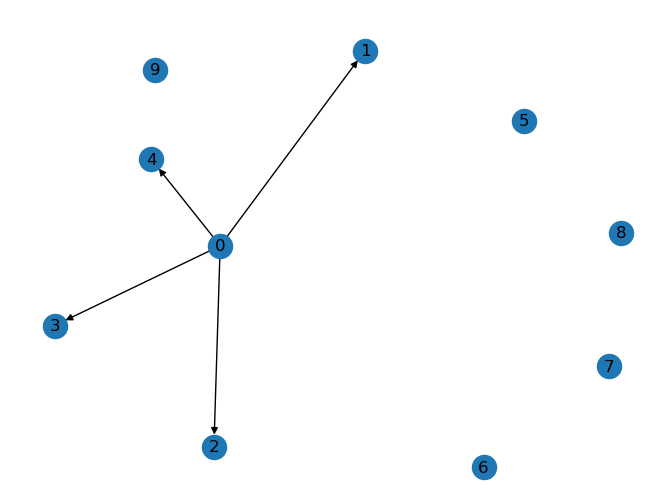

In [113]:
drawnx(g)

In [117]:
g.nodes()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [120]:
torch.randn(6,3)

tensor([[-1.0172,  0.9219,  1.3471],
        [-1.0445,  0.4890, -0.6445],
        [ 0.4089,  0.0830,  0.4329],
        [ 0.1190,  0.7822,  0.3480],
        [-0.2731,  0.9629,  1.7686],
        [ 1.0650,  1.3880, -0.6544]])

In [123]:
g.num_edges()

4

In [125]:
g.ndata['x']=torch.randn(10,4)
g.ndata['y']=torch.randn(10,3)#Node and edge features in DGL can be multi-dimensional.

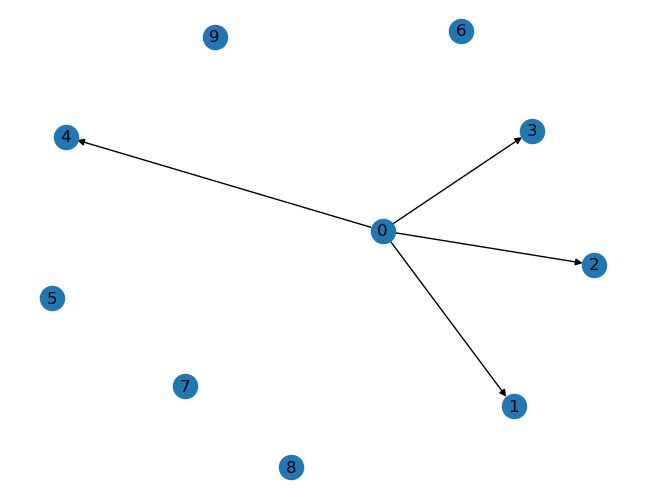

In [128]:
drawnx(g)

In [130]:
g.ndata['y']

tensor([[ 0.4578, -0.4756,  0.4712],
        [-0.8255,  0.2319, -1.2172],
        [-0.3333,  0.0899,  0.2171],
        [-0.1695, -0.5735, -1.2340],
        [-0.9209,  0.6294,  0.3897],
        [ 0.7087,  0.2831, -0.7393],
        [-1.2640, -1.4537,  1.2798],
        [-0.2167, -0.7145, -0.3072],
        [ 0.3174, -0.2575, -0.3264],
        [-1.3049,  0.0156,  0.9956]])

In [132]:
g.in_degrees(0)

0

In [133]:
g.out_degrees(0)

4

In [134]:
g

Graph(num_nodes=10, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32), 'y': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={})

In [ ]:
dgl.from_networkx(nx.p)